In [ ]:
import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First, mount your Google Drive to access files stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, you can read your CSV file. Replace `'path/to/your/file.csv'` with the actual path to your file in Google Drive. For example, if your file is in the root of your Drive, the path might be `/content/drive/MyDrive/your_file.csv`.

In [ ]:
path_base ='/content/drive/MyDrive/samples_fire'
!ls /content/drive/MyDrive/samples_fire/

sample_2024-01-01_2024-01-31_region_5.csv


In [ ]:
# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
csv_file_path = os.path.join(path_base, 'sample_2024-01-01_2024-01-31_region_5.csv' )
df = pd.read_csv(csv_file_path)
df = df.drop(columns=['system:index', '.geo'])
print(df.shape)
print(df['class'].value_counts())
# Display the first few rows of the DataFrame
display(df.head())

(4684, 28)
class
0    3810
1     874
Name: count, dtype: int64


,Blue_diff,Blue_post,Blue_pre,Green_diff,Green_post,Green_pre,NBR2_diff,NBR2_post,NBR2_pre,NBR_diff,...,Red_diff,Red_post,Red_pre,SWIR1_diff,SWIR1_post,SWIR1_pre,SWIR2_diff,SWIR2_post,SWIR2_pre,class
0,-104,1236,1340,-164,1113,1277,131,910,779,128,...,-156,1201,1357,-1270,2382,3652,-341,1990,2331,1
1,-63,1317,1380,-124,1213,1337,165,937,772,148,...,-117,1323,1440,-1333,2374,3707,-236,2096,2332,1
2,-100,1249,1349,-169,1109,1278,157,928,771,129,...,-175,1177,1352,-1405,2269,3674,-338,1967,2305,1
3,-63,1270,1333,-138,1145,1283,168,932,764,165,...,-118,1221,1339,-1330,2172,3502,-266,1899,2165,1
4,-129,1204,1333,-189,1070,1259,167,943,776,157,...,-208,1113,1321,-1411,2148,3559,-342,1917,2259,1


In [ ]:
lst_col = list(df.columns)
lst_col.remove('class')
print(lst_col)

['Blue_diff', 'Blue_post', 'Blue_pre', 'Green_diff', 'Green_post', 'Green_pre', 'NBR2_diff', 'NBR2_post', 'NBR2_pre', 'NBR_diff', 'NBR_post', 'NBR_pre', 'NDVI_diff', 'NDVI_post', 'NDVI_pre', 'NIR_diff', 'NIR_post', 'NIR_pre', 'Red_diff', 'Red_post', 'Red_pre', 'SWIR1_diff', 'SWIR1_post', 'SWIR1_pre', 'SWIR2_diff', 'SWIR2_post', 'SWIR2_pre']


Here is the code to generate 4 scatter plots using seaborn. You can change the column names in the `pairs` list to visualize different pairs of columns. The plots will be colored and marked based on the 'class' column.

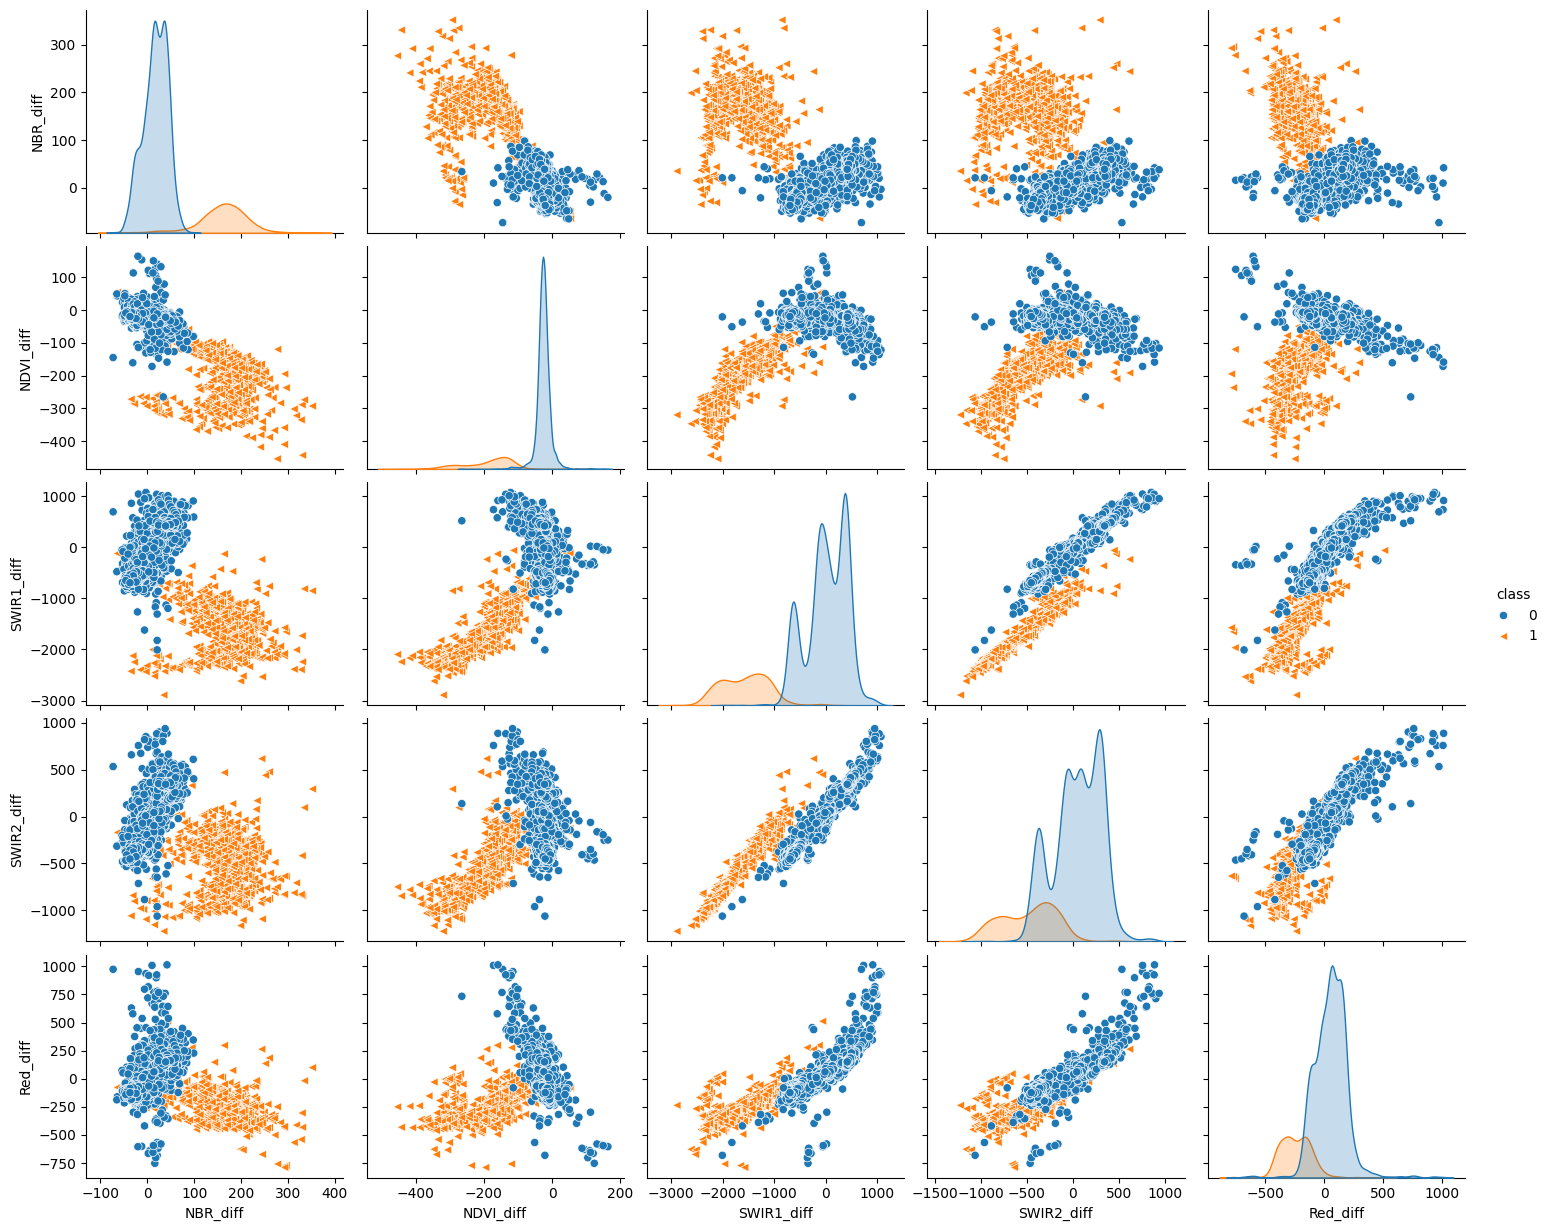

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# Define pairs of columns to plot
lst_colInt = [ 'NBR_diff', 'NDVI_diff', 'SWIR1_diff', 'SWIR2_diff', 'Red_diff', 'class']
sns.pairplot(data=df[lst_colInt],  hue="class", markers=["o", "<"],  aspect=1.2) # Increased height for larger plots
plt.figure(figsize=(16, 16))
plt.show()

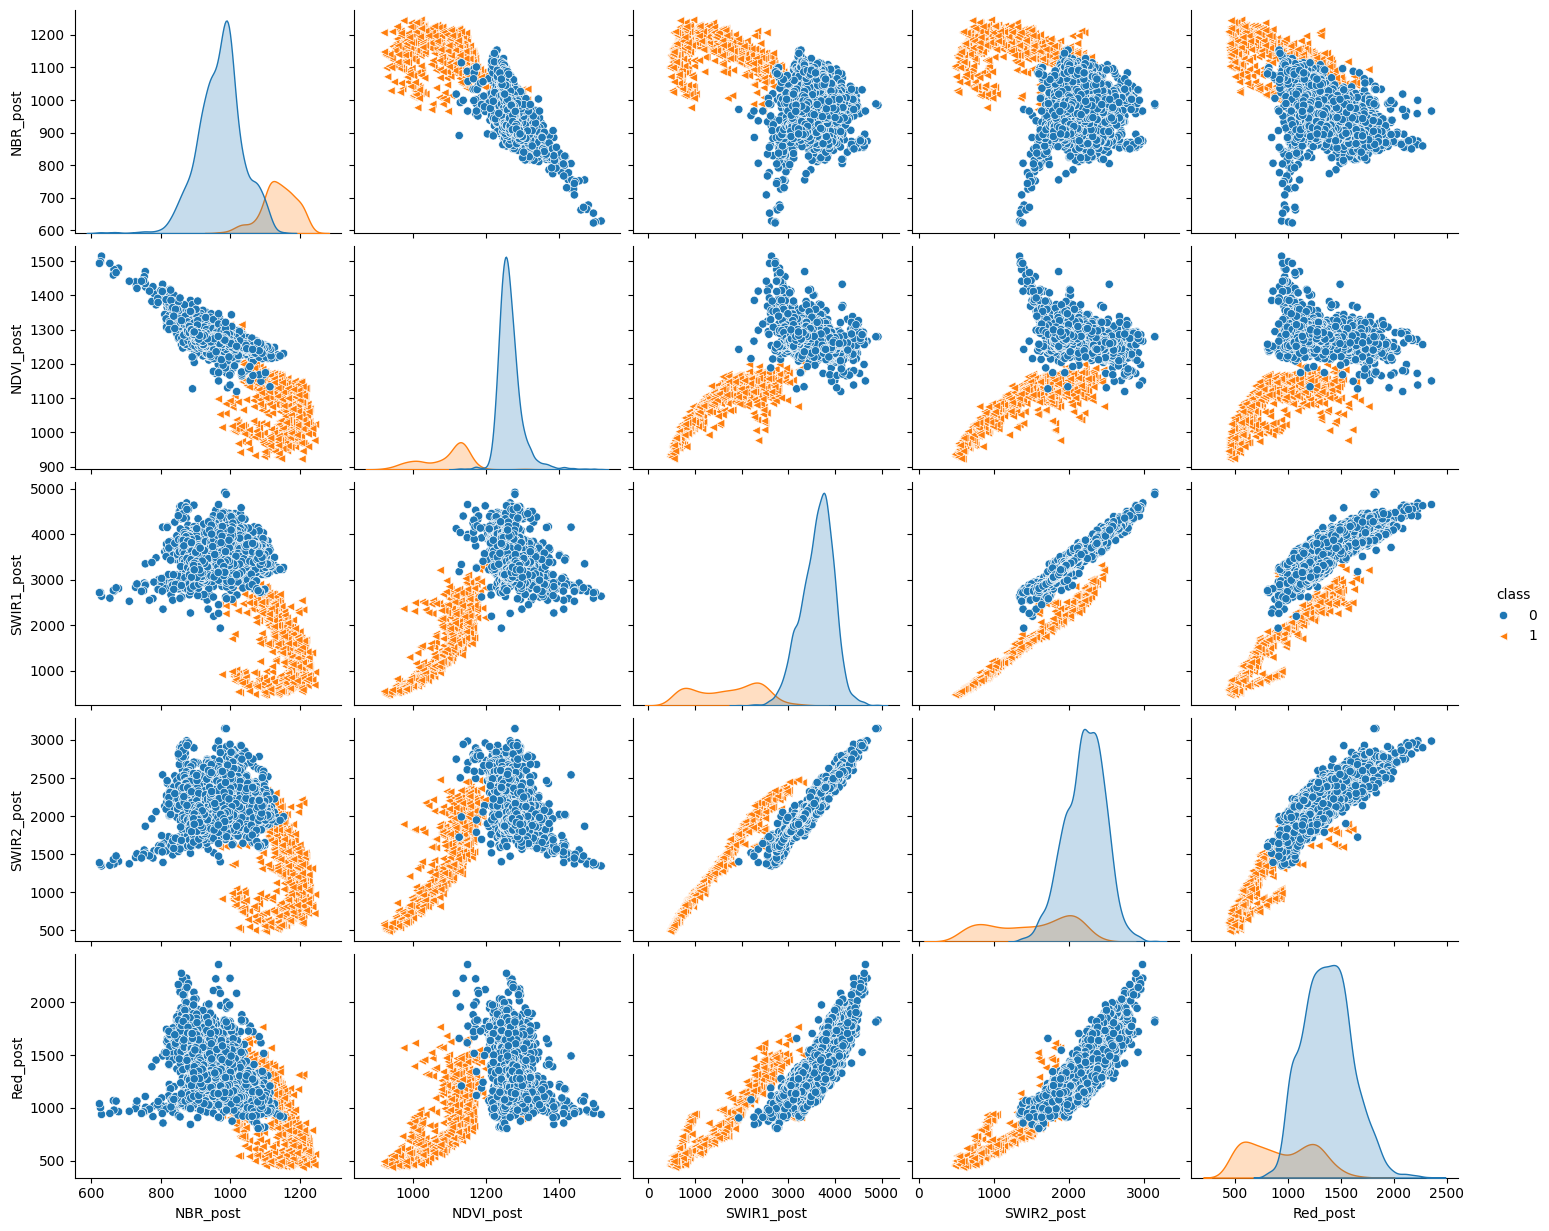

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# Define pairs of columns to plot
lst_colInt = [ 'NBR_post', 'NDVI_post', 'SWIR1_post', 'SWIR2_post', 'Red_post', 'class']
sns.pairplot(data=df[lst_colInt],  hue="class", markers=["o", "<"],  aspect=1.2) # Increased height for larger plots
plt.figure(figsize=(16, 16))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
X = df[lst_col]
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

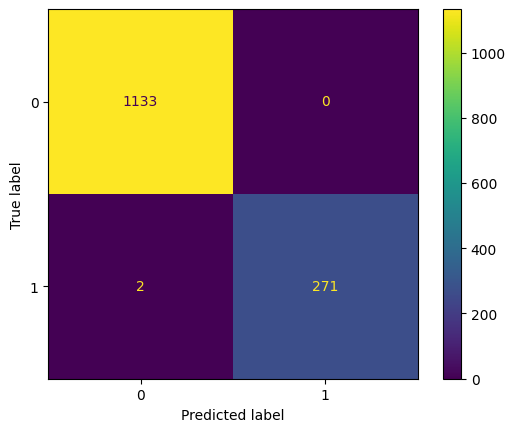

In [ ]:
predictions = forest.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=forest.classes_)
disp.plot()

In [ ]:
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.9985775248933144


In [ ]:
import time
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(importances)

[3.06530847e-04 1.06510284e-02 2.79782606e-04 6.73901884e-04
 1.06965163e-03 3.92133891e-04 1.36941866e-01 2.09148555e-01
 1.04462210e-03 6.60614144e-02 1.58096880e-02 1.48705491e-04
 4.19128308e-02 1.44363243e-01 2.06573268e-03 6.03072510e-02
 5.67214954e-02 3.43003185e-04 1.67006693e-02 9.12652627e-03
 3.80668493e-04 1.16679485e-01 1.05018920e-01 3.55060047e-04
 1.90307820e-03 1.09873863e-03 4.95417843e-04]


In [ ]:
# feature_names

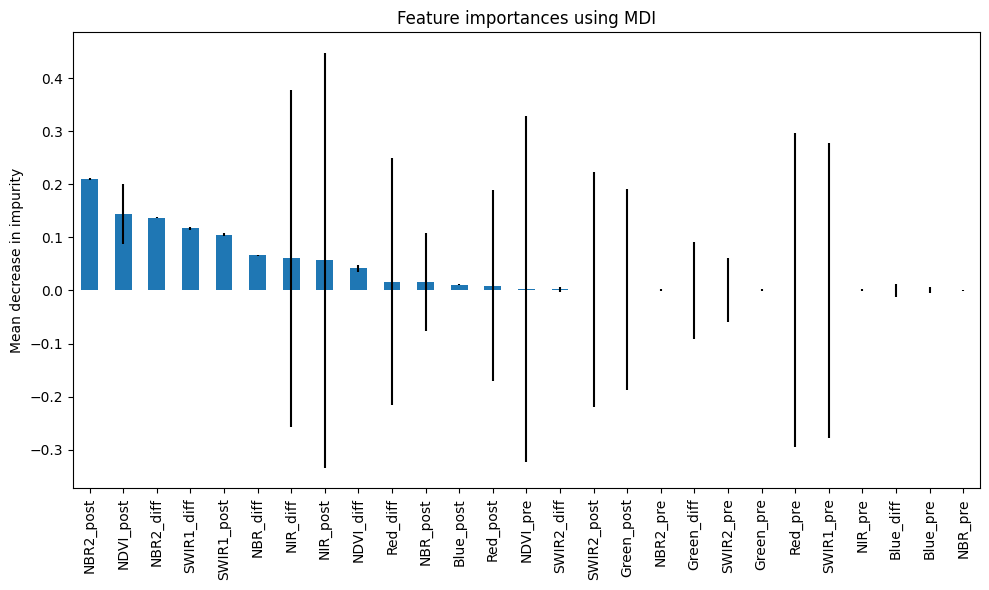

In [ ]:
forest_importances = pd.Series(importances, index=lst_col)
forest_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
print(list(forest_importances.index[:14]))

['NBR2_post', 'NDVI_post', 'NBR2_diff', 'SWIR1_diff', 'SWIR1_post', 'NBR_diff', 'NIR_diff', 'NIR_post', 'NDVI_diff', 'Red_diff', 'NBR_post', 'Blue_post', 'Red_post', 'NDVI_pre']
